In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os, glob
from collections import Counter

In [2]:
cd ~/dev/projetMemoire/

/Users/Theo/dev/projetMemoire


In [3]:
db = pd.read_csv("mortsduRif.csv", sep= "\t", engine='python')

In [4]:
db.columns

Index(['Unnamed: 0', 'id_conflit_intitule', 'id_sous_conflit_intitule',
       'id_famille_cote_intitule', 'sous_serie', 'serie', 'article', 'nom',
       'prenom', 'nom_autre', 'naissance_jour_mois_annee',
       'id_naissance_lieu_intitule', 'id_naissance_departement_intitule',
       'id_naissance_pays_intitule', 'id_statut_intitule',
       'id_mention_intitule', 'classe', 'recrutement_matricule',
       'id_recrutement_bureau_intitule', 'id_grade_intitule',
       'id_unite_intitule', 'id_bataillon_intitule', 'detail_unite',
       'id_profession_intitule', 'deces_jour_mois_annee',
       'id_deces_lieu_intitule', 'id_deces_departement_intitule',
       'id_deces_pays_intitule', 'id_operation_intitule',
       'id_transcription_etablissement_lieu_intitule',
       'id_transcription_etablissement_departement_intitule',
       'id_transcription_etablissement_pays_intitule', 'sources',
       'deportation', 'decoration_posthume', 'rehabilitation',
       'lien_ark_fiche', 'corps_retr

In [5]:
db

,Unnamed: 0,id_conflit_intitule,id_sous_conflit_intitule,id_famille_cote_intitule,sous_serie,serie,article,nom,prenom,nom_autre,...,id_transcription_etablissement_departement_intitule,id_transcription_etablissement_pays_intitule,sources,deportation,decoration_posthume,rehabilitation,lien_ark_fiche,corps_retrouve,disparition_jour_mois_annee,jdd_jour_mois_annee
0,0,Théâtres d'opérations extérieurs,Afrique du Nord,NaN,NaN,NaN,NaN,AB EL OUAHAB BEN SAID BEN BELGACEM,NaN,NaN,...,NaN,NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
1,4,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABABSIA OTHMANE BEN AHMED,NaN,NaN,...,NaN,Algérie,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
2,6,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABAD,Tayeb,NaN,...,NaN,NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
3,8,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABADIE,Jean Aubin,NaN,...,65 - Hautes-Pyrénées,NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4,19,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4034.0,ABBADIE,Jules Jean Marie,NaN,...,64 - Pyrénées-Atlantiques (ex Basses-Pyrénées),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,20020,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LOUZABI,Ahmed,NaN,...,NaN,Algérie,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4718,20034,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LUCAS,Marcel Charles,NaN,...,92 - Hauts-de-Seine (ex Seine et Seine-et-Oise),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4719,20046,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LUDWIG,Otto,NaN,...,75 - Paris (ex Seine),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN
4720,20048,Théâtres d'opérations extérieurs,Afrique du Nord,AC,40.0,R,4046.0,LUIGEMANN,Clément,NaN,...,75 - Paris (ex Seine),NaN,"Service historique de la Défense, Caen",0,0,0,https://www.memoiredeshommes.sga.defense.gouv....,0,NaN,NaN


In [6]:
db=db.drop('Unnamed: 0',axis=1)

In [7]:
db['id_unite_intitule'][4000]

'6e régiment de tirailleurs marocains (6e RTM)'

In [8]:
db['id_unite_intitule'].value_counts()

1er régiment étranger (1er RE)                              351
6e régiment de tirailleurs marocains (6e RTM)               229
13e régiment de tirailleurs (13e RT)                        195
2e régiment étranger (2e RE)                                191
14e régiment de tirailleurs (14e RT)                        149
                                                           ... 
13e régiment de tirailleurs coloniaux (13e RTC)               1
bâtiment "Montmirail"                                         1
42 e bataillon du génie                                       1
44 e régiment du génie                                        1
10e groupe d'artillerie de campagne d'Afrique (10e GACA)      1
Name: id_unite_intitule, Length: 308, dtype: int64

In [9]:
unitList = dict(Counter(db['id_unite_intitule']))
regiments=list(unitList.keys())
KIA=list(unitList.values())

In [10]:
unitList

{'20e régiment de tirailleurs (20e RT)': 87,
 '3e régiment de tirailleurs (3e RT)': 23,
 '31 e régiment de tirailleurs': 78,
 '14e régiment de tirailleurs Nord-Africains (14e RTNA)': 18,
 'service des renseignements (SR)': 7,
 '9e régiment de spahis (9e RS)': 25,
 '5e régiment de tirailleurs (5e RT)': 54,
 '1er régiment de tirailleurs algériens (1er RTA)': 15,
 '63e régiment de tirailleurs marocains (63e RTM)': 89,
 '61e régiment de tirailleurs marocains (61e RTM)': 113,
 '24e escadron du train des équipages militaires (24e ETEM)': 28,
 '6e régiment de tirailleurs marocains (6e RTM)': 229,
 '15e régiment de tirailleurs (15e RT)': 149,
 '13e régiment de tirailleurs (13e RT)': 195,
 '62e régiment de tirailleurs marocains (62e RTM)': 68,
 nan: 29,
 '28e régiment de tirailleurs Nord-Africains (28e RTNA)': 4,
 '21e goum mixte marocain (21e GMM)': 3,
 '4e régiment étranger (4e RE)': 94,
 "64e régiment d'artillerie (64e RA)": 41,
 '64e régiment de tirailleurs marocains (64e RTM)': 90,
 '23e r

In [11]:
mortsparRegiment=pd.DataFrame.from_dict(unitList, orient='index')
mortsparRegiment.columns= [" "]

In [12]:
mortsparRegiment=mortsparRegiment.sort_values(by=[" "],ascending=False)

In [13]:
mortsparRegiment

,
1er régiment étranger (1er RE),351
6e régiment de tirailleurs marocains (6e RTM),229
13e régiment de tirailleurs (13e RT),195
2e régiment étranger (2e RE),191
14e régiment de tirailleurs (14e RT),149
...,...
152e régiment d'infanterie (152e RI),1
5e groupe d'artillerie de campagne d'Afrique (5e GACA),1
26e régiment d'infanterie (26e RI),1
3 e régiment d'aviation,1


In [14]:
mortsparRegiment=mortsparRegiment.swapaxes('index','columns')

In [15]:
mortsparRegiment

,1er régiment étranger (1er RE),6e régiment de tirailleurs marocains (6e RTM),13e régiment de tirailleurs (13e RT),2e régiment étranger (2e RE),14e régiment de tirailleurs (14e RT),15e régiment de tirailleurs (15e RT),61e régiment de tirailleurs marocains (61e RTM),3e régiment étranger (3e RE),4e régiment étranger (4e RE),17e régiment de tirailleurs (17e RT),...,11e régiment de tirailleurs (11e RT),30 e escadron du train des équipages militaires,61 e régiment de chars de combat,régiment d'infanterie coloniale du Maroc (RICM),16e régiment de tirailleurs (16e RT),152e régiment d'infanterie (152e RI),5e groupe d'artillerie de campagne d'Afrique (5e GACA),26e régiment d'infanterie (26e RI),3 e régiment d'aviation,10e groupe d'artillerie de campagne d'Afrique (10e GACA)
,351,229,195,191,149,149,113,112,94,94,...,1,1,1,1,1,1,1,1,1,1


In [16]:
top20 = mortsparRegiment.columns[0:20]

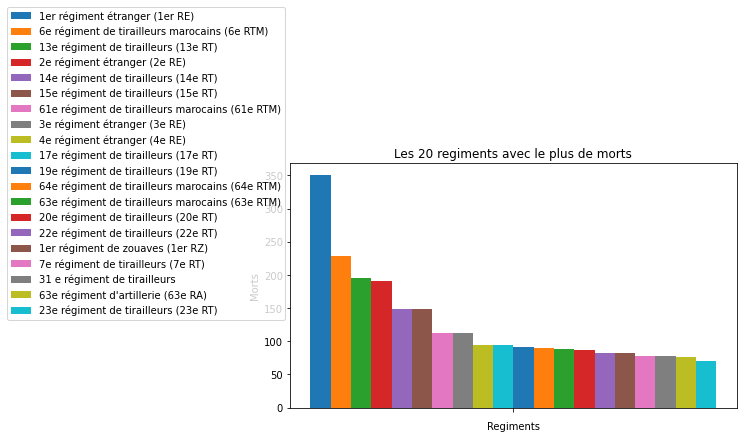

In [80]:
fig = mortsparRegiment[top20].plot(kind='bar', width = 5)
plt.legend(bbox_to_anchor=(0, 1), loc='right')
fig.set_ylabel('Morts')
fig.set_xlabel('Regiments')
fig.set_title('Les 20 regiments avec le plus de morts')
plt.rcParams["figure.figsize"] = [8.00, 4.50]

plt.savefig('20regiments.png', dpi = 200)


